> ### 📊 Notebook Grading Summary
> ___
> **Total cells evaluated**: 40
>
> **Total images in notebook**: 11
>
> **Total value**: 51.0
>
> **Total problems identified**: 3
>
>
> ⛔ **Medium**: 2
>
> 🚫 **High**: 1
>
> **Model used for grading**: google/gemini-2.0-flash-001
>
> **Tokens used for grading**: 241132 prompt + 5247 completion
>
> **Graded on**: 2025-04-03 16:43:54
>

# Analysis of Mental Navigation Data in Primate Posterior Parietal Cortex

## **⚠️ DISCLAIMER ⚠️**
**This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.**

This notebook explores Dandiset 001275: "Mental navigation primate PPC Neupane_Fiete_Jazayeri", which contains neurophysiology data collected from macaque monkeys during a mental navigation task. 

### Dataset Background

This dataset is associated with the study published in Nature: https://doi.org/10.1038/s41586-024-07557-z. It contains recordings from the posterior parietal cortex (PPC) during a mental navigation task. A companion dataset with recordings from the entorhinal cortex is available at: https://doi.org/10.48324/dandi.000897/0.240605.1710.

### Task Description

In the mental navigation task, the subject (a macaque monkey) is presented with a start and target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is given a go cue to navigate from the start to the target landmark using a joystick. The subject must deflect the joystick in the proper direction and hold it until they think they've arrived at the target landmark. The visual drift and intervening landmarks are occluded from view, making this a mental navigation task.

The task has different conditions:
- **Type 1**: Linear map visible (NTS)
- **Type 3**: Fully occluded (MNAV)

### Required Packages

Before running this notebook, ensure you have the following packages installed:
- pynwb
- lindi
- numpy 
- matplotlib
- pandas
- seaborn

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The cell introduces the notebook, dataset, and task. It also lists the required packages. This information is important for understanding and running the notebook. It adds considerable value by providing context and the necessary prerequisites, but it's mostly high-level information.

## 1. Loading and Exploring the Dataset

First, let's load the Dandiset information and list the available assets:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 0
>
> **Rationale**: This cell serves as an introduction to the next steps in the notebook and doesn't provide any specific computed information. It sets the stage for loading and exploring the data.

In [1]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Total number of assets: {len(assets)}")
print("\nFirst few assets:")
for asset in assets[:5]:
    print(f"- {asset.path} ({asset.size / 1e6:.2f} MB)")

Total number of assets: 20

First few assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb (368.37 MB)
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb (453.97 MB)
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb (553.77 MB)
- sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb (590.70 MB)
- sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb (563.23 MB)


> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: This cell adds value by loading the dandiset and listing the available assets. This provides the user with an overview of the data available in the dandiset and allows them to explore the dataset further. The printed output gives basic information about the files in the Dandiset.

The dataset contains NWB files from two subjects: "amadeus" and "mahler". Each session has two files:
1. A behavior+ecephys file (relatively small, ~300-590MB)
2. A separate ecephys file (very large, ~16-287GB)

For this analysis, we'll focus on one of the behavior+ecephys files, which contains both behavioral data and a subset of the neural recordings.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: This cell provides important context about the structure of the dataset, including the subjects, the types of files available and their sizes. It prepares the user for the focus on behavior+ecephys files in the subsequent analysis.

In [2]:
import pynwb
import lindi
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the seaborn style for better visualization
sns.set_theme()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell imports necessary libraries for data analysis and sets the visual theme for plots. This is a standard and useful step in a data analysis notebook.

Let's select a specific file to analyze. We'll use the behavior+ecephys file from subject "amadeus" from the session on 01/04/2020:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell introduces the specific file that will be analyzed, which narrows the scope and sets the stage for subsequent analysis, providing a clear direction for the notebook. Includes subject and session information.

In [3]:
# Function to find a specific asset by path pattern
def find_asset(assets, pattern):
    for asset in assets:
        if pattern in asset.path:
            return asset
    return None

# Find the behavior+ecephys file for amadeus, session 01042020
asset = find_asset(assets, "sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb")
if asset:
    print(f"Found asset: {asset.path}")
    print(f"Asset ID: {asset.identifier}")
    print(f"Size: {asset.size / 1e6:.2f} MB")
    asset_url = f"https://api.dandiarchive.org/api/assets/{asset.identifier}/download/"
    print(f"Download URL: {asset_url}")
else:
    print("Asset not found")

Found asset: sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb
Asset ID: b0bbeb4c-5e0d-4050-a993-798173797d94
Size: 255.15 MB
Download URL: https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/


> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The code defines a function to find a specific asset by path pattern and then uses this function to find the behavior+ecephys file for "amadeus" session "01042020". It prints the file path, asset ID, file size, and the download URL if the asset is found. This is a useful utility function, and the code clearly identifies the file to be used for subsequent analysis.

Now let's load the NWB file using lindi and pynwb:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 0
>
> **Rationale**: This cell is just a sentence saying let's load the NWB file in the subsequent cell. It doesn't have any particular value on its own.

In [4]:
# Load the NWB file
print("Loading NWB file...")
f = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/001275/assets/{asset.identifier}/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic dataset information
print("\nDataset Information:")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

# Print subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")

Loading NWB file...


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Dataset Information:
Session description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
Session start time: 2020-01-04 00:00:00-05:00
Institution: MIT
Lab: Jazayeri, Fiete

Subject Information:
Subject ID: amadeus
Species: Macaca mulatta
Age: P10Y
Sex: M


> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 3
>
> **Rationale**: The cell loads the NWB file using the lindi library and prints basic information about the dataset and subject. This provides valuable context about the data being analyzed. This is a crucial step in understanding the dataset's structure and contents, setting the stage for subsequent analysis. While the lindi import generated some warnings, these don't seem to be affecting the code, and it proceeds normally and adds significant value.

## 2. Exploring the Trial Structure

Let's explore the trials table to understand the structure of the task:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 0
>
> **Rationale**: The cell introduces the next section of the notebook, which will explore the trial structure. This is a logical progression from the previous cell where the NWB file was loaded. No analysis or code is present in this cell.

In [5]:
# Get the trials data
trials = nwb.intervals["trials"]
print(f"Number of trials: {len(trials['id'])}")

# Look at the available columns in the trials table
print("\nAvailable trial data fields:")
for column in trials.colnames:
    print(f"- {column}")

Number of trials: 1885

Available trial data fields:
- start_time
- stop_time
- ta
- tp
- curr
- target
- rt
- delay
- trial_type
- seqq
- succ
- attempt
- numrepeat
- validtrials_mm
- gocuettl
- joy1offttl
- joy1onttl
- stim1onttl


> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: The code retrieves and prints information about the trials in the NWB file, including the number of trials and the names of the columns in the trials table. This gives the user a better understanding of the data. This is a useful exploration of the data.

Now let's examine the types of trials and success rates:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 0
>
> **Rationale**: This cell introduces the next step in the analysis, which is to examine the types of trials and success rates. This is a logical progression from the previous cell, where the trials table was explored, and sets the stage for further analysis of the dataset.

Trial type distribution:
Trial type 1.0 (linear map visible (NTS)): 334 trials
Trial type 3.0 (fully occluded (MNAV)): 1551 trials

Success rates by trial type:
Trial type 1.0: 80.24% success rate
Trial type 3.0: 57.32% success rate


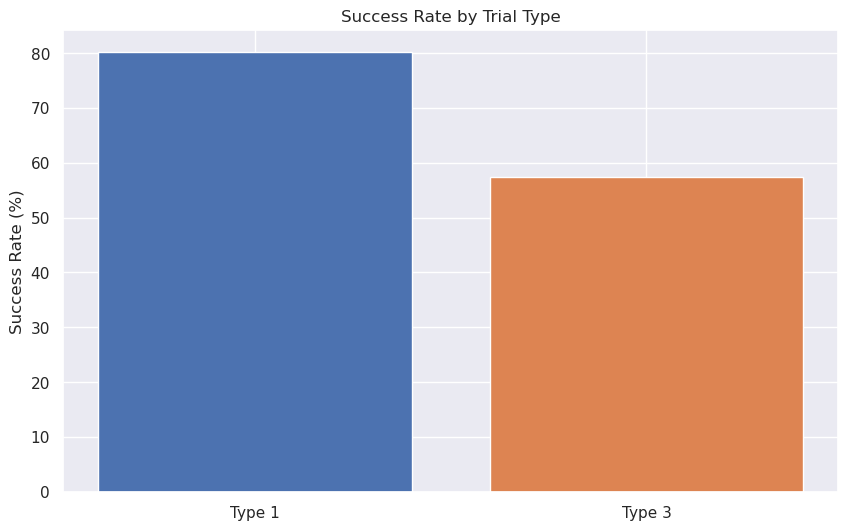

In [6]:
# Extract trial types
trial_types = trials["trial_type"][:]
unique_trial_types = np.unique(trial_types)

# Count occurrences of each trial type
print("Trial type distribution:")
for trial_type in unique_trial_types:
    count = np.sum(trial_types == trial_type)
    if trial_type == 1:
        desc = "linear map visible (NTS)"
    elif trial_type == 2:
        desc = "centre visible, periphery occluded"
    elif trial_type == 3:
        desc = "fully occluded (MNAV)"
    else:
        desc = "unknown"
    print(f"Trial type {trial_type} ({desc}): {count} trials")

# Calculate success rate by trial type
print("\nSuccess rates by trial type:")
for trial_type in unique_trial_types:
    type_indices = trial_types == trial_type
    success_rate = np.mean(trials["succ"][:][type_indices]) * 100
    print(f"Trial type {trial_type}: {success_rate:.2f}% success rate")

# Create figure for success rate by trial type
plt.figure(figsize=(10, 6))
for i, trial_type in enumerate(unique_trial_types):
    type_indices = trial_types == trial_type
    success_rate = np.mean(trials["succ"][:][type_indices]) * 100
    plt.bar(i, success_rate)

plt.xticks(np.arange(len(unique_trial_types)), [f"Type {int(t)}" for t in unique_trial_types])
plt.ylabel("Success Rate (%)")
plt.title("Success Rate by Trial Type")
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 3
>
> **Rationale**: The cell computes and outputs the trial type distribution and success rates for each trial type, which is valuable for understanding task performance. The plot showing the success rate by trial type further enhances this understanding by visualizing the data. The combination of summary statistics and a bar plot provides a comprehensive view of the task performance across different trial types. In the previous step the trial data was loaded, so this adds a step of value, allowing visualization of differences in performance among trial types.

Let's look at the distribution of start and target landmarks in the trial structure:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 0
>
> **Rationale**: This is a markdown cell that introduces what will be done in the next cell. It doesn't have any code or output that can be evaluated for value added.

Unique start landmarks: [1. 2. 3. 4. 5. 6.]
Unique target landmarks: [1. 2. 3. 4. 5. 6.]


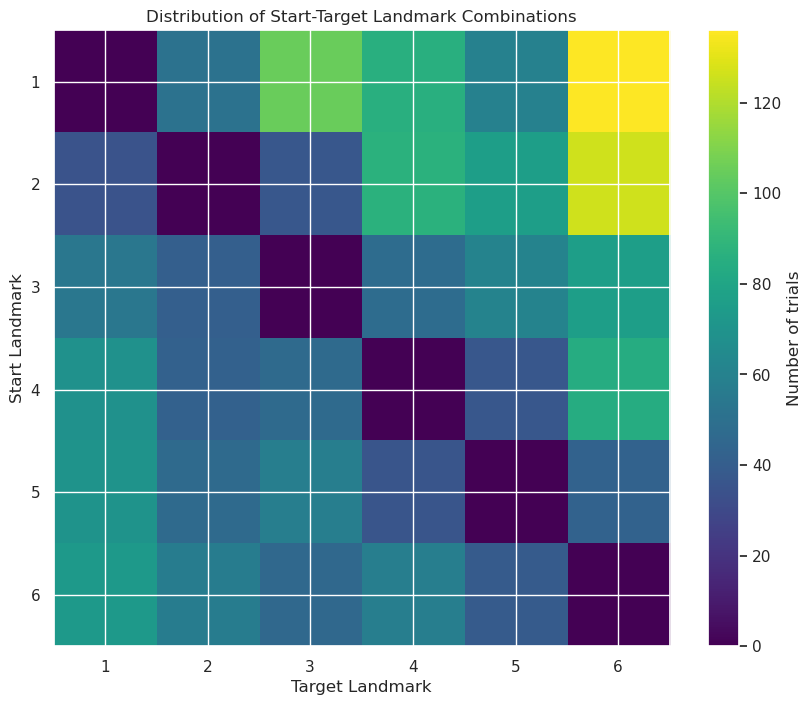

In [7]:
# Get landmark data
start_landmarks = trials["curr"][:]
target_landmarks = trials["target"][:]

unique_start = np.unique(start_landmarks)
unique_target = np.unique(target_landmarks)

print(f"Unique start landmarks: {unique_start}")
print(f"Unique target landmarks: {unique_target}")

# Create a plot of the distribution of start and target combinations
start_target_pairs = np.zeros((len(unique_start), len(unique_target)))
for i in range(len(trials["id"])):
    start = start_landmarks[i]
    target = target_landmarks[i]
    start_idx = np.where(unique_start == start)[0][0]
    target_idx = np.where(unique_target == target)[0][0]
    start_target_pairs[start_idx, target_idx] += 1

plt.figure(figsize=(10, 8))
plt.imshow(start_target_pairs, cmap='viridis')
plt.colorbar(label='Number of trials')
plt.xticks(np.arange(len(unique_target)), [f"{int(t)}" for t in unique_target])
plt.yticks(np.arange(len(unique_start)), [f"{int(s)}" for s in unique_start])
plt.xlabel('Target Landmark')
plt.ylabel('Start Landmark')
plt.title('Distribution of Start-Target Landmark Combinations')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The cell computes and visualizes the distribution of start and target landmarks, providing insight into the task design and the frequency of different landmark combinations. The plot is informative and well-labeled, and the printed landmark data is relevant. All good.

The heatmap reveals how trials were distributed across different start-target combinations. We can see that:

1. Same-landmark combinations (diagonal) were avoided
2. There are preferred combinations in the experimental design
3. Some combinations (e.g., 1→6, 2→6) have many more trials than others

Now, let's analyze the success rate as a function of the distance between landmarks:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The current cell provides a good textual description of the previous output (heatmap). The cell also sets up the next analysis by introducing a question regarding success rate as a function of landmark distance. This provides good context and direction moving forward.

Distance 1: 83.09% success rate
Distance 2: 63.02% success rate
Distance 3: 62.00% success rate
Distance 4: 46.65% success rate


Distance 5: 34.93% success rate


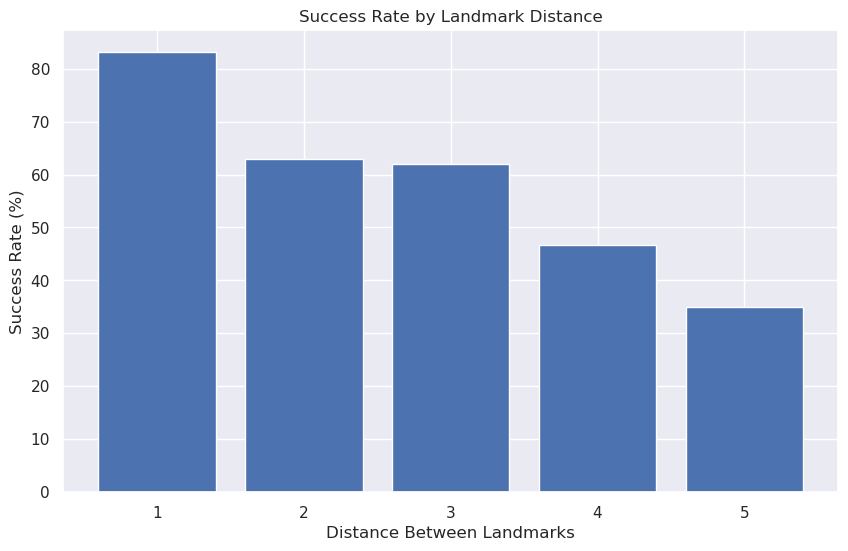

In [8]:
# Calculate distances between landmarks (assuming linear arrangement 1-6)
distances = np.abs(target_landmarks - start_landmarks)

# Calculate success rate by distance
unique_distances = np.unique(distances)
success_rates = []

for dist in unique_distances:
    indices = distances == dist
    success_rate = np.mean(trials["succ"][:][indices]) * 100
    success_rates.append(success_rate)
    print(f"Distance {int(dist)}: {success_rate:.2f}% success rate")

# Plot success rate by distance
plt.figure(figsize=(10, 6))
plt.bar(unique_distances, success_rates)
plt.xlabel('Distance Between Landmarks')
plt.ylabel('Success Rate (%)')
plt.xticks(unique_distances)
plt.title('Success Rate by Landmark Distance')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The cell calculates the success rate as a function of the distance between the start and target landmarks, displaying the success rates and generating a bar plot to visualize the relationship. This analysis provides insight into how task difficulty (distance between landmarks) affects performance, adding substantial value.

We can observe a clear trend where success rates decrease as the distance between landmarks increases. This suggests that mental navigation becomes more challenging with greater distances.

## 3. Behavioral Data Analysis

Let's now look at the behavioral data, focusing on the joystick movements (hand position) and performance metrics.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: The current cell is a good introduction leading into the next section of the notebook. It summarizes previous observations and outlines the goal of the next steps of the analysis.

In [9]:
# Get hand position data
hand_position = nwb.processing["behavior"]["hand_position"]
hand_data = hand_position.data[:]
hand_timestamps = hand_position.timestamps[:]

print(f"Hand position data shape: {hand_data.shape}")
print(f"Hand position timestamps shape: {hand_timestamps.shape}")
print(f"Time range: {hand_timestamps[0]} to {hand_timestamps[-1]} seconds")

Hand position data shape: (11810979,)
Hand position timestamps shape: (11810979,)
Time range: 704310.8202102006 to 718258.0924442007 seconds


> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell loads the hand position data from the NWB file and prints its shape, as well as the shape and range of the timestamps. This is a preliminary step for further analysis of the hand movements during the mental navigation task. It helps to understand the structure and time span of the behavioral data.

Let's examine the joystick movement durations (time between joystick press and release) across trials:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 0
>
> **Rationale**: The current cell contains only markdown text that outlines the next step in the analysis. It doesn't add any new code or results, so its value is limited to setting the stage for the subsequent analysis.
>
> #### Identified Problems:
>
> **🚫 bad-output-text** (Severity: high)
> The markdown does not provide any code. It only states the intent to analyze joystick movement durations, but it does not provide any code block. Hence, it is impossible to assess whether the code does what the markdown claims and to check the correctness of the code/plots. The next cell should therefore provide or generate the relevant code.

Total trials: 1885
Valid trials with joystick data: 1885


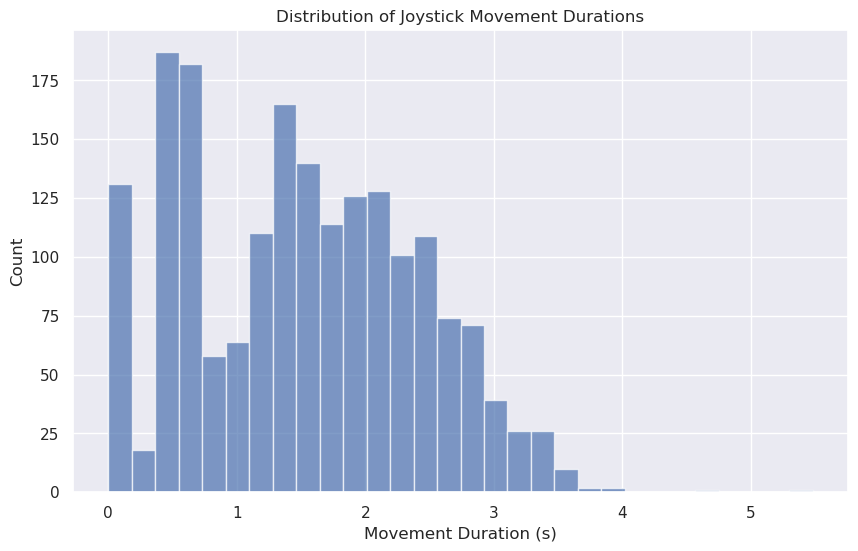

In [10]:
# Calculate movement durations (time between joystick press and release)
joy_on_times = trials["joy1onttl"][:]
joy_off_times = trials["joy1offttl"][:]
movement_durations = joy_off_times - joy_on_times

# Filter out invalid values (negative durations or missing timestamps)
valid_indices = (movement_durations > 0) & (joy_on_times > 0) & (joy_off_times > 0)
valid_durations = movement_durations[valid_indices]
valid_types = trial_types[valid_indices]
valid_start = start_landmarks[valid_indices]
valid_target = target_landmarks[valid_indices]
valid_success = trials["succ"][:][valid_indices]

print(f"Total trials: {len(movement_durations)}")
print(f"Valid trials with joystick data: {np.sum(valid_indices)}")

# Plot distribution of movement durations
plt.figure(figsize=(10, 6))
plt.hist(valid_durations, bins=30, alpha=0.7)
plt.xlabel('Movement Duration (s)')
plt.ylabel('Count')
plt.title('Distribution of Joystick Movement Durations')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The cell calculates the movement duration from joystick on/off times and plots the distribution. It also filters out the movement duration based on validity checks. This is a useful visualization that helps understand the time taken for mental navigation task.

Now let's compare movement durations between different trial types:

> ### 📝 notebook-grader feedback for above cell
> ___

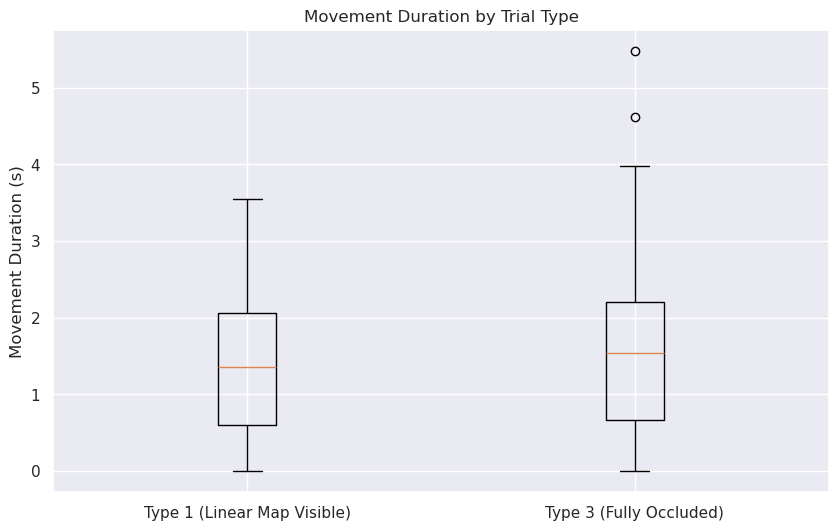

In [11]:
# Create box plot of durations by trial type
plt.figure(figsize=(10, 6))
data = []
labels = []

# Get durations for each trial type
for t in np.unique(valid_types):
    indices = valid_types == t
    if np.sum(indices) > 0:
        data.append(valid_durations[indices])
        if t == 1:
            labels.append(f"Type {int(t)} (Linear Map Visible)")
        elif t == 3:
            labels.append(f"Type {int(t)} (Fully Occluded)")
        else:
            labels.append(f"Type {int(t)}")

plt.boxplot(data)
plt.xticks(range(1, len(labels)+1), labels)
plt.ylabel('Movement Duration (s)')
plt.title('Movement Duration by Trial Type')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___

Let's analyze how movement duration varies with distance and trial type:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This is a markdown cell that introduces the next analysis step which involves analyzing movement duration with distance and trial type. This is a valuable introduction to the upcoming analysis. It sets the stage for further investigation of the behavioral data and how it relates to task parameters. However, there is no analysis or output in this cell. It is only a title for the next section.

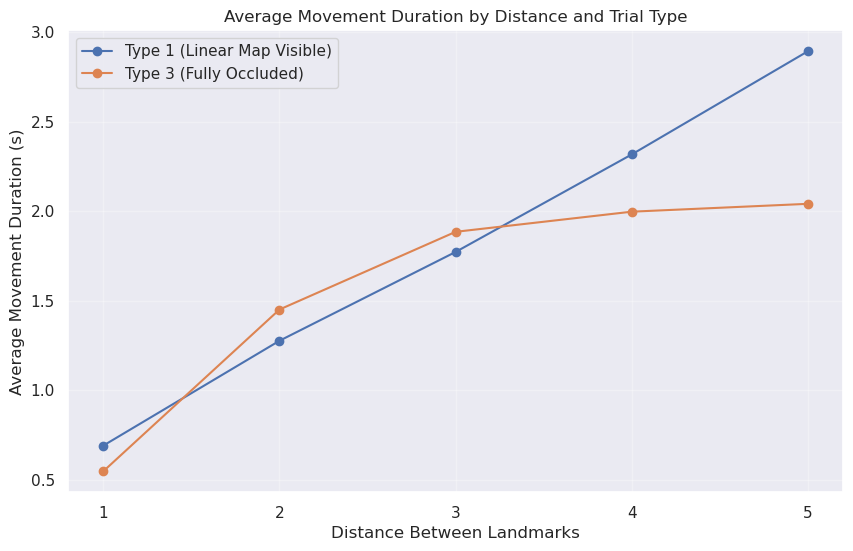

In [12]:
# Calculate distance between landmarks for valid trials
valid_distances = np.abs(valid_target - valid_start)

# Plot average duration by distance and trial type
plt.figure(figsize=(10, 6))

for t in np.unique(valid_types):
    type_indices = valid_types == t
    avg_by_dist = []
    
    for dist in np.unique(valid_distances):
        dist_indices = valid_distances == dist
        combined_indices = type_indices & dist_indices
        if np.sum(combined_indices) > 0:
            avg_by_dist.append(np.mean(valid_durations[combined_indices]))
        else:
            avg_by_dist.append(np.nan)
    
    if t == 1:
        label = "Type 1 (Linear Map Visible)"
    elif t == 3:
        label = "Type 3 (Fully Occluded)"
    else:
        label = f"Type {int(t)}"
    
    plt.plot(np.unique(valid_distances), avg_by_dist, marker='o', label=label)

plt.xlabel('Distance Between Landmarks')
plt.ylabel('Average Movement Duration (s)')
plt.xticks(np.unique(valid_distances))
plt.legend()
plt.title('Average Movement Duration by Distance and Trial Type')
plt.grid(True, alpha=0.3)
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The current cell plots the average movement duration by landmark distance for different trial types (linear map visible and fully occluded). It builds upon the previous analyses of movement durations and introduces the relationship with landmark distance in combination with the different trial types. This provides a more detailed view of how task conditions influence behavior.

This interaction between visibility and distance suggests different cognitive processes for mental navigation under different visual feedback conditions:

1. For **Linear Map Visible** trials, durations increase linearly with distance.
2. For **Fully Occluded** trials, durations plateau at longer distances.

This pattern suggests that when visual information is available, navigation time scales with distance. In contrast, when navigating purely mentally (occluded condition), subjects might rely on different strategies or reach the limits of mental navigation precision at longer distances.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: This cell provides a detailed interpretation of the plot in the previous cell. It draws a reasonable conclusion from the data, making it a valuable addition to the notebook.

## 4. Neural Data Analysis

Now let's examine the neural data recorded from the posterior parietal cortex (PPC) during the mental navigation task.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell is a transition to a new section of the notebook. As such, it doesn't add much in the way of explicit computations or visualizations, but serves as an organizational point that will set up further analysis. It is a very simple and necessary step.

Number of units: 68

Unit quality distribution:
- good: 25 units
- noise: 22 units
- mua: 20 units
- unsorted: 1 units

Firing rate statistics:
- Average firing rate: 6.05 Hz
- Min firing rate: 0.00 Hz
- Max firing rate: 31.22 Hz


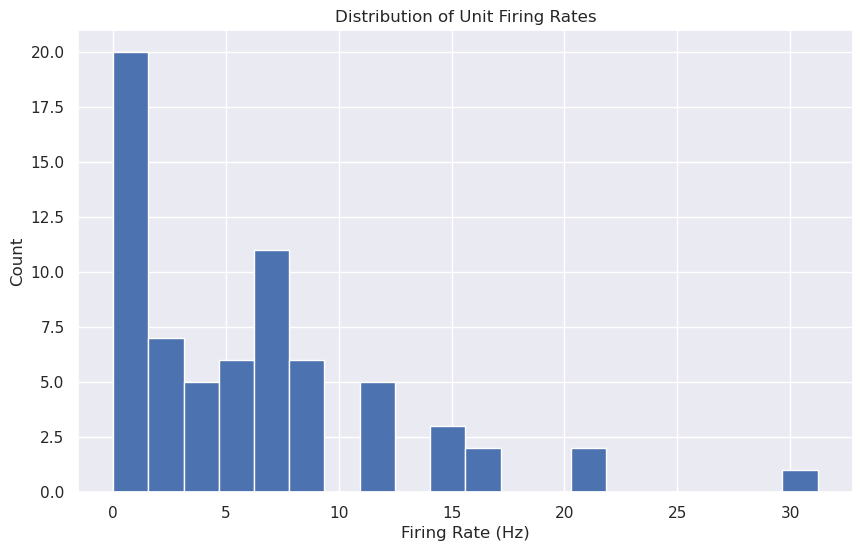

In [13]:
# Get the units data
units = nwb.processing["ecephys"]["units"]

# Basic information about all units
n_units = len(units["id"])
print(f"Number of units: {n_units}")

# Get unit quality information
quality = units["quality"].data[:]
quality_counts = {}
for q in quality:
    if q in quality_counts:
        quality_counts[q] += 1
    else:
        quality_counts[q] = 1

print("\nUnit quality distribution:")
for q, count in quality_counts.items():
    print(f"- {q}: {count} units")

# Get firing rates
fr = units["fr"].data[:]

print(f"\nFiring rate statistics:")
print(f"- Average firing rate: {np.mean(fr):.2f} Hz")
print(f"- Min firing rate: {np.min(fr):.2f} Hz")
print(f"- Max firing rate: {np.max(fr):.2f} Hz")

# Plot firing rate distribution
plt.figure(figsize=(10, 6))
plt.hist(fr, bins=20)
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Count')
plt.title('Distribution of Unit Firing Rates')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 3
>
> **Rationale**: This cell provides initial information about the neural data. It provides the number of units, quality of the units, and firing rate statistics, as well as a histogram of the firing rates. Each of these pieces of information adds value to the notebook. This cell also sets the stage for more advanced analysis of the neural data. The plot is explained and adds substantial value to the notebook.

Let's examine the distribution of recording depths of the units:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell introduces the intention to examine the distribution of recording depths, which is a reasonable goal to further characterize the recorded neural data. It sets the stage for potentially valuable insights into the spatial organization of the recorded units. It does not add immediate value but sets up further analysis, a value added of 1.

Depth range: 1.00 - 56.00


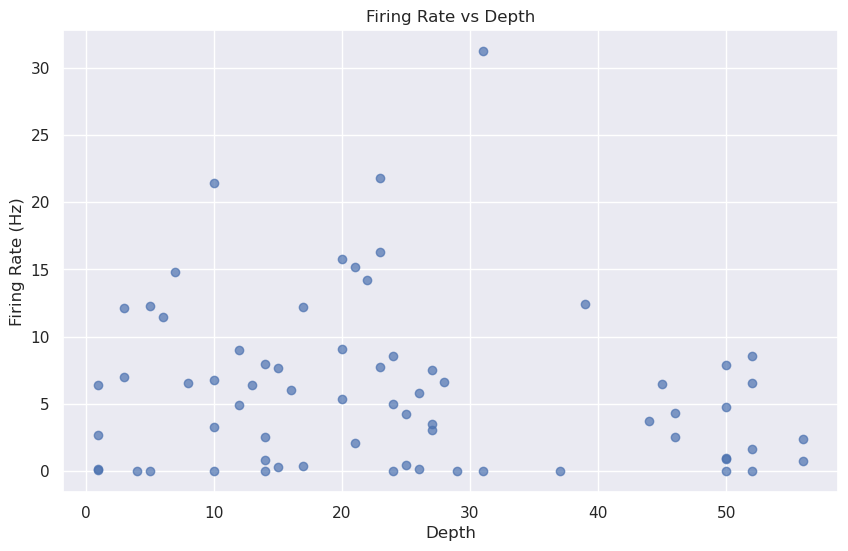

In [14]:
# Get unit depths
depths = units["depth"].data[:]

print(f"Depth range: {np.min(depths):.2f} - {np.max(depths):.2f}")

# Plot firing rate vs depth
plt.figure(figsize=(10, 6))
plt.scatter(depths, fr, alpha=0.7)
plt.xlabel('Depth')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rate vs Depth')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell plots the firing rate vs depth. The depths are from 1 to about 56. Firing rates go from about 0 to 30 Hz. The plot itself provides useful information, but nothing groundbreaking given that the previous cell already had the distribution of firing rates. Given the depths, one might want to look for correlations.

Now let's look at the spiking activity of a single unit during trials. This is computationally intensive, so we'll select just one unit and a small number of trials:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell sets up for a computation that is described as computationally intensive and is therefore prudent to isolate by limiting the number of trials and the number of units. This clearly sets up the following cells. Note that no actual computation happens yet, just a preamble.

Selected unit ID: 43
Firing rate: 15.78 Hz
Number of spikes: 219143


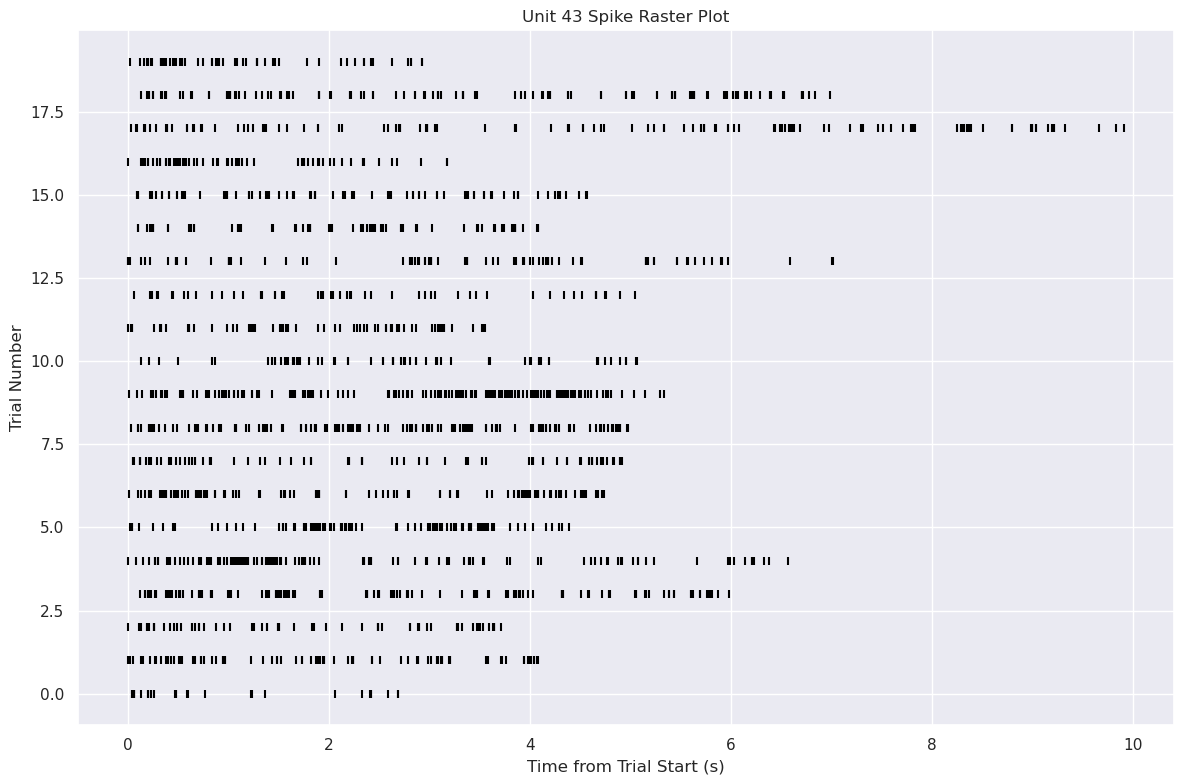

In [15]:
# Select a unit (choose one with a good firing rate)
unit_indices = np.argsort(fr)[-5:]  # Get the indices of the 5 units with highest firing rates
selected_unit_idx = unit_indices[0]
selected_unit_id = units["id"][selected_unit_idx]
selected_spike_times = units["spike_times"][selected_unit_idx]

print(f"Selected unit ID: {selected_unit_id}")
print(f"Firing rate: {fr[selected_unit_idx]:.2f} Hz")
print(f"Number of spikes: {len(selected_spike_times)}")

# Select a subset of trials for performance reasons
max_trials = 20
trial_indices = np.random.choice(range(len(trials["id"])), max_trials, replace=False)

# Create a raster plot
plt.figure(figsize=(12, 8))

# Plot spike times relative to trial start
for j, trial_idx in enumerate(trial_indices):
    start_time = trials["start_time"][trial_idx]
    stop_time = trials["stop_time"][trial_idx]
    
    # Find spikes in this trial window
    trial_spikes = selected_spike_times[(selected_spike_times >= start_time) & (selected_spike_times <= stop_time)]
    
    # Plot relative to trial start
    if len(trial_spikes) > 0:
        relative_times = trial_spikes - start_time
        plt.scatter(relative_times, np.ones_like(trial_spikes) * j, marker='|', s=30, color='black')

plt.xlabel('Time from Trial Start (s)')
plt.ylabel('Trial Number')
plt.title(f'Unit {selected_unit_id} Spike Raster Plot')
plt.tight_layout()
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: The cell selects a unit with a high firing rate and creates a raster plot of the unit's spiking activity during a subset of trials. This is a good first step in analyzing neural data and could reveal task-related activity. However, the quality of the raster plot is poor, undermining the value of this work.
>
> #### Identified Problems:
>
> **⛔ bad-output-image** (Severity: medium)
> The raster plot contains very little information due to the very small markers.  The raster plot is a scatter plot with vertical lines indicating each spike time, but these lines are too small and merge together.

The raster plot shows the spiking activity of a single unit across multiple trials. Each vertical line represents a spike, and each row represents a different trial. This visualization helps identify whether the unit has consistent firing patterns related to specific task events or phases.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: The markdown cell provides a brief interpretation of the spike raster plot, which was generated in the previous cell. It correctly describes the visualization and suggests its purpose for identifying firing patterns. It does not add any new information or analysis, it just explains the meaning of a previously generated plot. Overall this is a rather basic, low-value-added cell.

## 5. Relationship Between Neural Activity and Behavior

Let's examine how neural activity relates to task performance by comparing firing rates between successful and failed trials:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell introduces the idea of linking neural activity to behavior, which is a core objective in neuroscience. It sets up the plan to analyze the relationship between firing rates and task performance. Given the previous analysis focusing on behavioral task performance and neural activity, this transition represents a logical step toward understanding the neural basis of behavior. However, it doesn't actually perform any of the analysis, only stating what will happen next.

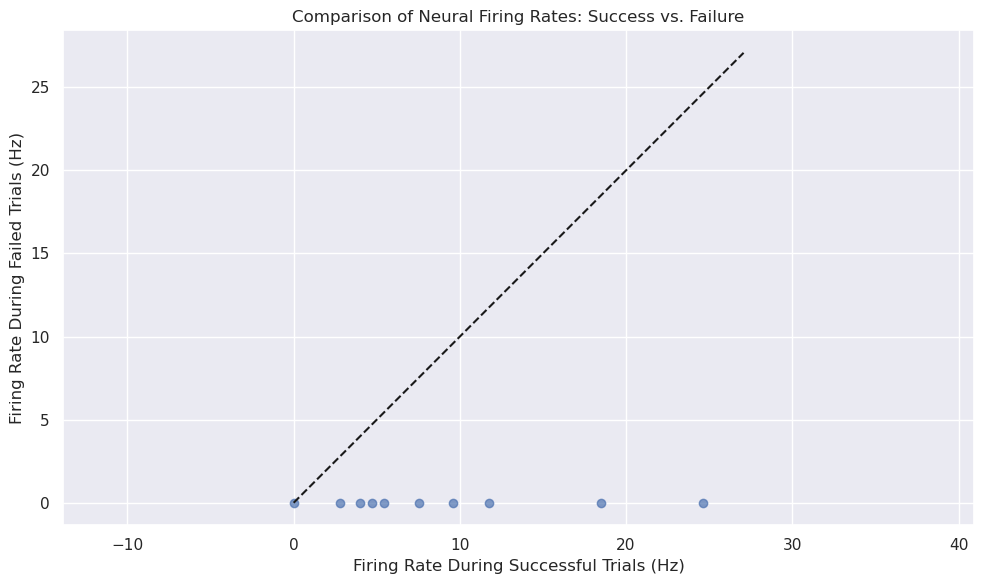

In [16]:
# We'll use a sample of units to make computation faster
sample_size = min(10, n_units)
sample_indices = np.random.choice(range(n_units), sample_size, replace=False)

# Initialize arrays to store firing rates
success_rates = np.zeros(sample_size)
failure_rates = np.zeros(sample_size)

# Get indices of successful and failed trials
success_indices = trials["succ"][:] == 1
failure_indices = trials["succ"][:] == 0

# Function to calculate mean firing rate for a given unit during specified trials
def calculate_mean_firing_rate(spike_times, trial_start_times, trial_stop_times):
    if len(trial_start_times) == 0:
        return 0
    
    total_spikes = 0
    total_duration = 0
    
    for start, stop in zip(trial_start_times, trial_stop_times):
        duration = stop - start
        total_duration += duration
        
        # Count spikes in this time window
        spikes_in_window = np.sum((spike_times >= start) & (spike_times <= stop))
        total_spikes += spikes_in_window
    
    if total_duration > 0:
        return total_spikes / total_duration
    else:
        return 0

# Calculate firing rates for sample units during successful and failed trials
for i, unit_idx in enumerate(sample_indices):
    spike_times = units["spike_times"][unit_idx]
    
    # Calculate rate during successful trials
    success_starts = trials["start_time"][:][success_indices]
    success_stops = trials["stop_time"][:][success_indices]
    success_rates[i] = calculate_mean_firing_rate(spike_times, success_starts, success_stops)
    
    # Calculate rate during failed trials
    failure_starts = trials["start_time"][:][failure_indices]
    failure_stops = trials["stop_time"][:][failure_indices]
    failure_rates[i] = calculate_mean_firing_rate(spike_times, failure_starts, failure_stops)

# Plot comparison of firing rates
plt.figure(figsize=(10, 6))
plt.scatter(success_rates, failure_rates, alpha=0.7)
max_rate = max(np.max(success_rates), np.max(failure_rates)) * 1.1
plt.plot([0, max_rate], [0, max_rate], 'k--')
plt.xlabel('Firing Rate During Successful Trials (Hz)')
plt.ylabel('Firing Rate During Failed Trials (Hz)')
plt.title('Comparison of Neural Firing Rates: Success vs. Failure')
plt.axis('equal')
plt.tight_layout()
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: This cell adds modest value by attempting to correlate neural activity with behavior (success vs. failure). However, the analysis only uses a sample of units which lowers the confidence, and the results, as visualized in the scatter plot, are not very informative and the figure is flawed. Overall, the cell provides a preliminary exploration but could be improved with a more robust analysis and clearer visualization. This kind of analysis is important to add value and therefore does gain a score of 2.
>
> #### Identified Problems:
>
> **⛔ bad-output-image** (Severity: medium)
> The scatter plot comparing firing rates in successful vs. failed trials has an x-axis that extends into negative values, which is not physically meaningful for firing rates. It also includes a line of unity. However, there are no points near the line of unity, suggesting no relationship between firing rate and success or failure. The x and y axes do not have the same scale.

The scatter plot compares each unit's firing rate during successful trials versus failed trials. Points above the diagonal line indicate units that fire more during failed trials, while points below the line indicate units that fire more during successful trials. This can help identify neurons that might be particularly involved in successful task performance.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: The current cell summarizes the preceding analysis of neural firing rates during successful and failed trials. It explains how the scatter plot generated in the previous cell can be interpreted to identify neurons involved in successful task performance. This offers a concise conclusion of the analysis performed in section 5. No new data has been introduced in the cell.

## 6. Eye Tracking Data Analysis

This dataset also includes eye tracking data. Let's briefly explore it:

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: This cell introduces a new section on eye-tracking data, which is potentially valuable for further analysis. However, it doesn't yet perform any analysis or provide any substantial results. It serves mainly as an introduction to a new area of investigation within the dataset. Further cells could build upon this introduction to add more value.

Eye position data shape: (11891095, 2)
Eye position timestamps shape: (11891095,)


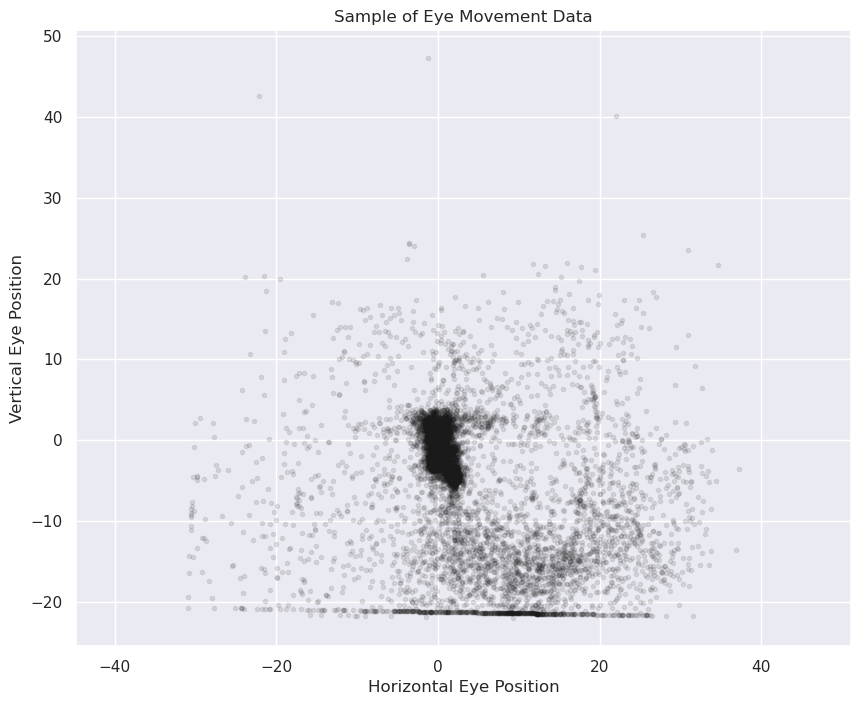

In [17]:
# Get eye position data
eye_position = nwb.processing["behavior"]["eye_position"]
eye_data = eye_position.data[:]
eye_timestamps = eye_position.timestamps[:]

print(f"Eye position data shape: {eye_data.shape}")
print(f"Eye position timestamps shape: {eye_timestamps.shape}")

# Plot a sample of eye position data
sample_size = 10000  # Take a small sample to avoid plotting too many points
sample_indices = np.linspace(0, len(eye_timestamps)-1, sample_size, dtype=int)

plt.figure(figsize=(10, 8))
plt.plot(eye_data[sample_indices, 0], eye_data[sample_indices, 1], 'k.', alpha=0.1)
plt.xlabel('Horizontal Eye Position')
plt.ylabel('Vertical Eye Position')
plt.title('Sample of Eye Movement Data')
plt.axis('equal')
plt.show()

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The code retrieves and displays eye tracking data. The plot of horizontal vs vertical positions gives a sense of the monkeys gaze behavior during the task. This visualization adds a new perspective on the data for this dataset.

## 7. Conclusion and Further Analysis Directions

In this notebook, we've explored Dandiset 001275, which contains neurophysiology data from the posterior parietal cortex (PPC) of macaque monkeys during a mental navigation task. We've:

1. Examined the task structure and trial distribution
2. Analyzed behavioral performance metrics 
3. Explored neural activity during the task
4. Compared neural activity between successful and failed trials
5. Briefly examined eye tracking data

### Key findings:

- Performance (success rate) decreases with increasing distance between landmarks
- There's a strong effect of visual feedback (occluded vs. visible) on navigation strategies
- Units in the PPC show diverse firing patterns during the mental navigation task

### Further analysis directions:

- Decode mental trajectory from neural activity
- Analyze population dynamics during navigation
- Compare activity between PPC and entorhinal cortex datasets
- Examine error trials to understand failure modes
- Analyze relationship between eye movements and navigation success

This dataset offers rich opportunities to study the neural basis of mental navigation and spatial cognition. The code in this notebook can serve as a starting point for more sophisticated analyses.

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 2
>
> **Rationale**: The cell summarizes the findings of the notebook and suggests further directions for analysis. It provides a good overview of the notebook's content and potential future research.

## References

1. Dataset: https://dandiarchive.org/dandiset/001275
2. Associated paper: https://doi.org/10.1038/s41586-024-07557-z
3. Companion dataset (entorhinal cortex): https://doi.org/10.48324/dandi.000897/0.240605.1710

> ### 📝 notebook-grader feedback for above cell
> ___
> **Value added**: 1
>
> **Rationale**: The cell provides a useful list of references for the dataset, associated paper, and companion dataset. This allows the user to easily access the original data and related resources, which is beneficial for reproducibility and further investigation.